<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;"
>
<h5>Fun with Tufte</h5>
<p>Some Codinng Examples<p>
</div>

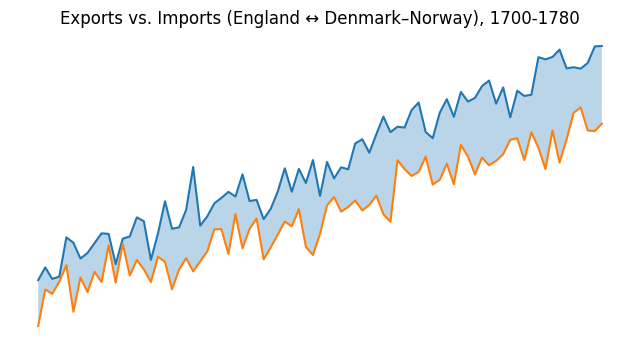

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Playfair – Exports vs. Imports (1700-1780)
# ------------------------------------------------------------------

# Set the output path to "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"

df_playfair = pd.read_csv("/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data/playfair_trade.csv")

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_playfair["year"], df_playfair["exports"],
        label="Exports", lw=1.5)
ax.plot(df_playfair["year"], df_playfair["imports"],
        label="Imports", lw=1.5)

# Shade years with a trade surplus
ax.fill_between(df_playfair["year"],
                df_playfair["exports"],
                df_playfair["imports"],
                where=df_playfair["exports"] > df_playfair["imports"],
                alpha=0.30)

ax.set_axis_off()                     # classic Playfair minimalism
plt.title("Exports vs. Imports (England ↔ Denmark–Norway), 1700-1780")
plt.show()

# Set the output path to "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"

#save this file to the output path

fig.savefig(f"{output_path}/exports_vs_imports.png", bbox_inches="tight")


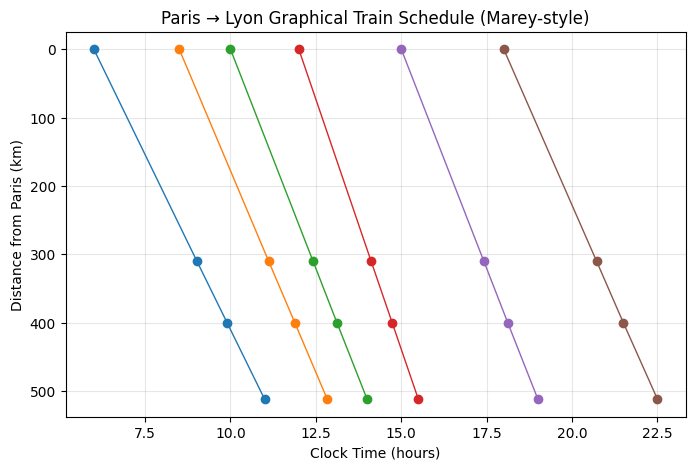

In [21]:

# ------------------------------------------------------------------
# 2. Marey – Paris → Lyon Graphical Train Schedule
# ------------------------------------------------------------------

df_marey = pd.read_csv("/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data/marey_paris_lyon.csv")

fig, ax = plt.subplots(figsize=(8, 5))
for train_id, grp in df_marey.groupby("train"):
    ax.plot(grp["time_hours"], grp["km"],
            marker="o", lw=1, label=train_id)

ax.set_xlabel("Clock Time (hours)")
ax.set_ylabel("Distance from Paris (km)")
ax.invert_yaxis()                     # Paris at top, Lyon at bottom
ax.grid(alpha=0.30)
plt.title("Paris → Lyon Graphical Train Schedule (Marey-style)")
plt.show()

fig.savefig(f"{output_path}/Paris → Lyon Graphical Train Schedule (Marey-style).png", bbox_inches="tight")



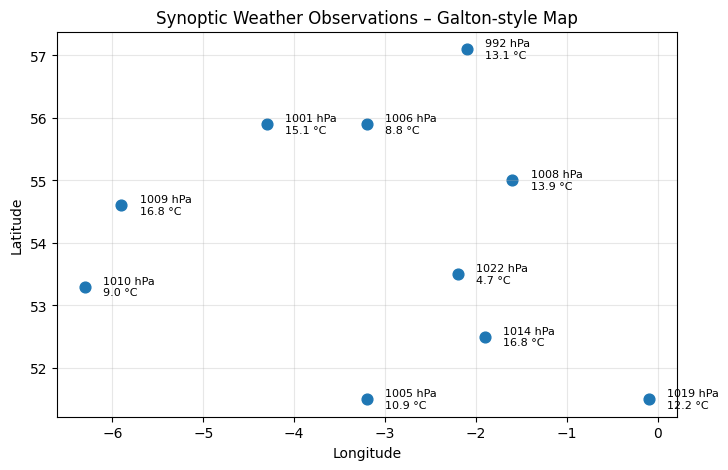

In [3]:

# ------------------------------------------------------------------
# 3. Galton – Daily Synoptic Weather Map
# ------------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Set the output path to "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"

df_weather = pd.read_csv(f"{output_path}/galton_weather.csv")

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df_weather["lon"], df_weather["lat"], s=60)

for _, r in df_weather.iterrows():
    ax.text(r["lon"] + 0.20, r["lat"],
            f"{int(r['pressure_hPa'])} hPa\n{r['temp_C']:.1f} °C",
            fontsize=8, va="center")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(alpha=0.30)
plt.title("Synoptic Weather Observations – Galton-style Map")
plt.show()

fig.savefig(f"{output_path}/Synoptic Weather Observations – Galton-style Map.png", bbox_inches="tight")

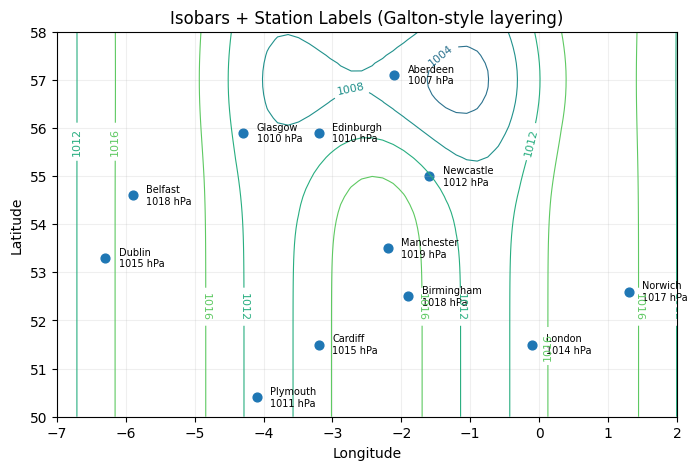

In [4]:
import numpy as np, matplotlib.pyplot as plt

#### This my output path you will need to set path on your computer
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"

# synthetic pressure field over lon[-7, 2], lat[50, 58]
lon = np.linspace(-7, 2, 60); lat = np.linspace(50, 58, 50)
LON, LAT = np.meshgrid(lon, lat)
pressure = 1015 - 12*np.exp(-((LON+2)**2 + (LAT-57)**2)/3) + 4*np.sin(LON*2)  # hPa

# sample 12 stations
stations = [("London", 51.5, -0.1), ("Birmingham", 52.5, -1.9),
            ("Manchester", 53.5, -2.2), ("Newcastle", 55.0, -1.6),
            ("Glasgow", 55.9, -4.3), ("Edinburgh", 55.9, -3.2),
            ("Cardiff", 51.5, -3.2), ("Belfast", 54.6, -5.9),
            ("Dublin", 53.3, -6.3), ("Aberdeen", 57.1, -2.1),
            ("Norwich", 52.6,  1.3), ("Plymouth", 50.4, -4.1)]

fig, ax = plt.subplots(figsize=(8,5))
cs = ax.contour(LON, LAT, pressure, levels=np.arange(992, 1026, 4), linewidths=.8)
ax.clabel(cs, inline=True, fontsize=8, fmt="%.0f")
ax.scatter([s[2] for s in stations], [s[1] for s in stations], s=40)

for name, la, lo in stations:
    # sample the gridded pressure for label value
    pi = pressure[(np.abs(lat-la)).argmin(), (np.abs(lon-lo)).argmin()]
    ax.text(lo+0.2, la, f"{name}\n{pi:.0f} hPa", fontsize=7, va='center')

ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude"); ax.grid(alpha=.2)
plt.title("Isobars + Station Labels (Galton-style layering)")
plt.show()



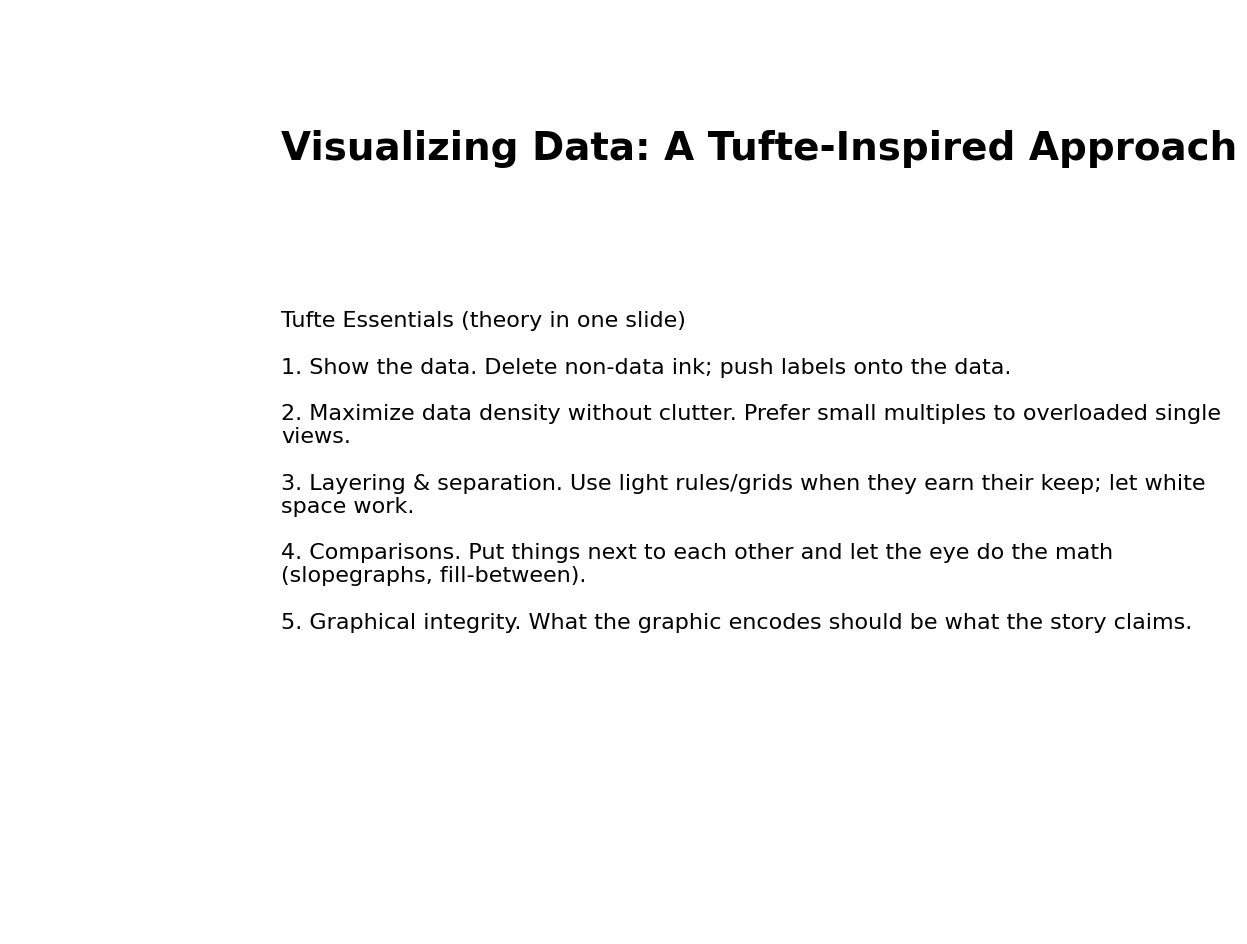

In [ ]:
#### Title Slide

import matplotlib.pyplot as plt

# Text to display
title = "Visualizing Data: A Tufte-Inspired Approach"
essentials = (
	"Tufte Essentials (theory in one slide)\n"
    "\n"
	"1. Show the data. Delete non-data ink; push labels onto the data.\n"
    "\n"
    
	"2. Maximize data density without clutter. Prefer small multiples to overloaded single views.\n"
    "\n"
	"3. Layering & separation. Use light rules/grids when they earn their keep; let white space work.\n"
    "\n"
	"4. Comparisons. Put things next to each other and let the eye do the math (slopegraphs, fill-between).\n"
    "\n"
	"5. Graphical integrity. What the graphic encodes should be what the story claims."
)

fig, ax = plt.subplots(figsize=(10, 12))
ax.axis('off')
plt.text(0.35, 0.85, title, fontsize=28, ha='left', va='center', weight='bold')
plt.text(0.35, 0.5, essentials, fontsize=16, ha='left', va='center', wrap=True)
plt.show()

# Set the output path to "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"

fig.savefig(f"{output_path}/Tufte Essentials-Title Slide.png", bbox_inches="tight")



1) Sparkline (micro time-series)


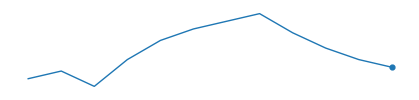

In [23]:
#########################################################
print("1) Sparkline (micro time-series)")
#########################################################

import matplotlib.pyplot as plt

output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"


y = [80, 82, 78, 85, 90, 93, 95, 97, 92, 88, 85, 83]

fig = plt.figure(figsize=(4, .8))
ax = fig.add_axes([0,0,1,1])
ax.plot(y, lw=1)
ax.scatter([len(y)-1], [y[-1]], s=12)
ax.axis('off')
plt.show()

fig.savefig(f"{output_path}/Sparkline.png", bbox_inches="tight")


2) Slope Graph Then and Now


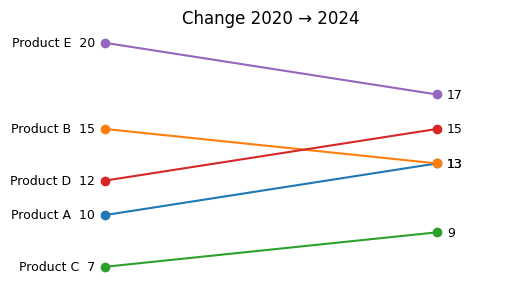

In [24]:

#########################################################
print("2) Slope Graph Then and Now")
#########################################################

# Set the output path to "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"


cats = ['Product A','Product B','Product C','Product D','Product E']
y0   = [10, 15,  7, 12, 20]
y1   = [13, 13,  9, 15, 17]

fig, ax = plt.subplots(figsize=(6,3.2))
for i,c in enumerate(cats):
    ax.plot([0,1],[y0[i],y1[i]], marker='o', lw=1.5)
    ax.text(-.03, y0[i], f'{c}  {y0[i]}', ha='right', va='center', fontsize=9)
    ax.text(1.03,  y1[i], f'{y1[i]}',    ha='left',  va='center', fontsize=9)

ax.set_xlim(-.2,1.2); ax.set_xticks([]); ax.set_yticks([])
for s in ax.spines.values(): s.set_visible(False)
plt.title('Change 2020 → 2024')
plt.show()

fig.savefig(f"{output_path}/Slope Graph.png", bbox_inches="tight")


3) Cleveland Dot Plot (compact categorical comparison)


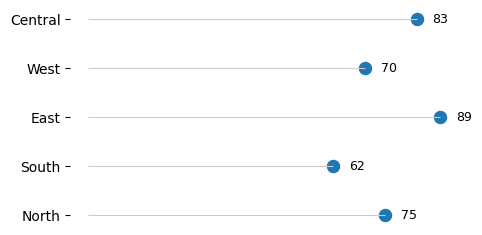

In [25]:

#########################################################
print("3) Cleveland Dot Plot (compact categorical comparison)")
#########################################################

names = ['North','South','East','West','Central']
vals  = [75,62,89,70,83]

fig, ax = plt.subplots(figsize=(5,2.8))
ax.hlines(range(len(names)), [0]*len(names), vals, lw=.8, color='0.8')
ax.scatter(vals, range(len(names)), s=75)
ax.set_yticks(range(len(names))); ax.set_yticklabels(names)
ax.set_xticks([]); ax.set_xlabel('')
for s in ax.spines.values(): s.set_visible(False)
for v,i in zip(vals, range(len(names))):
    ax.text(v+4, i, str(v), va='center', fontsize=9)
plt.show()

fig.savefig(f"{output_path}/Cleveland Dot Plot.png", bbox_inches="tight")


4) Playfair’s Trade Chart (fill-between surplus)


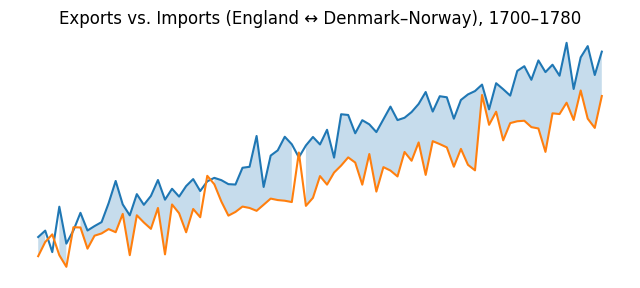

In [26]:

#########################################################
print("4) Playfair’s Trade Chart (fill-between surplus)")
#########################################################

import numpy as np, matplotlib.pyplot as plt
np.random.seed(2)
years   = np.arange(1700, 1781)
exports = 6 + 0.10*(years-1700) + np.random.normal(0, .5, len(years))
imports = 5 + 0.08*(years-1700) + np.random.normal(0, .6, len(years))

fig, ax = plt.subplots(figsize=(8,3.2))
ax.plot(years, exports, lw=1.5, label='Exports')
ax.plot(years, imports, lw=1.5, label='Imports')
ax.fill_between(years, exports, imports, where=exports>imports, alpha=.25)
ax.set_axis_off()
plt.title('Exports vs. Imports (England ↔︎ Denmark–Norway), 1700–1780')
plt.show()

fig.savefig(f"{output_path}/Playfair’s Trade Chart.png", bbox_inches="tight")


5) Minard-Lite Flow Map (advance/retreat with width = quantity)


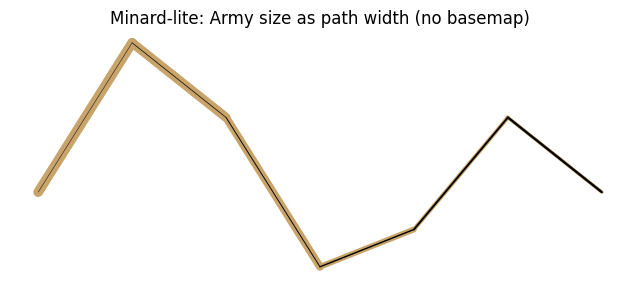

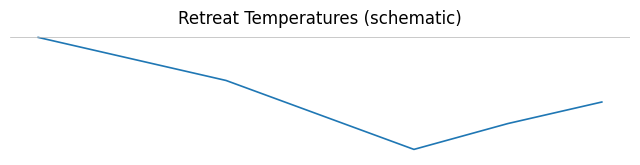

In [27]:

#########################################################
print("5) Minard-Lite Flow Map (advance/retreat with width = quantity)")
#########################################################

import numpy as np, matplotlib.pyplot as plt

# Waypoints (toy coordinates, left→right = west→east)
x = np.array([0,  1,  2,  3,  4,  5,  6])        # advance to Moscow
y = np.array([0, .2, .1,-.1,-.05,.1, 0])
troops_adv = np.array([422, 400, 340, 250, 175, 145, 100])  # thousands
troops_ret = np.array([100, 80, 60, 40, 30, 20, 10])        # retreat back

fig = plt.subplots(figsize=(8,3.2))[1]
ax = plt.gca()

# Advance (tan) and retreat (black) with width ∝ troops
for i in range(len(x)-1):
    ax.plot([x[i],x[i+1]],[y[i],y[i+1]],
            lw=troops_adv[i]/60, color='#c8a36a', solid_capstyle='round')
for i in range(len(x)-1):
    ax.plot([x[::-1][i],x[::-1][i+1]],[y[::-1][i],y[::-1][i+1]],
            lw=troops_ret[i]/60, color='black', solid_capstyle='round')

ax.set_axis_off(); plt.title("Minard-lite: Army size as path width (no basemap)")

# Temperature strip (retreat)
temps = np.array([0,-5,-10,-18,-26,-20,-15])   # °C, schematic
fig2, ax2 = plt.subplots(figsize=(8,1.6))
ax2.plot(range(len(temps)), temps, lw=1.2)
ax2.axhline(0, lw=.5, color='0.7'); ax2.set_axis_off()
plt.title("Retreat Temperatures (schematic)"); plt.show()

fig.figure.savefig(f"{output_path}/Minard-Lite Flow Map.png", bbox_inches="tight")




<div style="background-color: #1f77b4; color: #FFFF00; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;">
<h5>Tufte Visualizations More Advance visualizations.</h5>
<p>Advanced Coding Examples.

⸻

Teaching wrap-ups (why these are “advanced Tufte.”).  
    •	Small multiples emphasize comparison over ornament.  

    •	Bump charts make ordering the protagonist.  

    •	Fan charts use layering & separation to encode uncertainty honestly.  

    •	Isobars + stations integrate multiple variables in one coherent scene.  

    •	Two-way Marey packs process timing, capacity, and conflicts into a single, readable panel.  

<p>
</div>

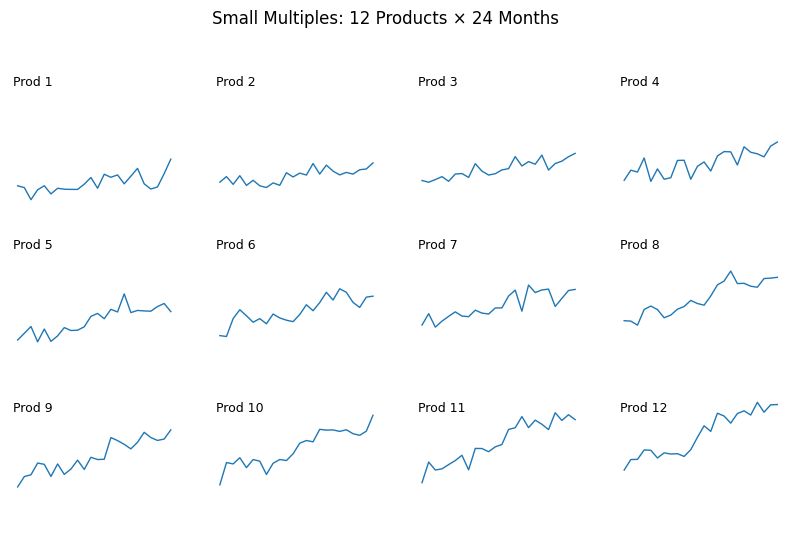

In [28]:
#########################################################
# 1) Small Multiples (12 compact time-series)
#
# Why Tuftean: comparisons trump individual magnitudes; repeating a simple form reduces cognitive load (small multiples).
# Read it: scan across the grid to see which products rise/fall and how consistently.
#
# Tableau: put Product on Rows/Columns (grid), Month on Columns, Value on Rows, Marks=Line; hide axes; add a tiny corner label per pane.
# Power BI: Line chart → Small multiples field = Product; share axes; remove legends; small labels in the corners.
#########################################################


import numpy as np, matplotlib.pyplot as plt


#### This my output path you will need to set path on your computer
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"


np.random.seed(10)
t = np.arange(1, 25)  # 24 months
n = 12                # 12 products
Y = (np.linspace(0.5, 1.5, n)[:,None] * (10 + 0.4*t + np.sin(t/2))
     + np.random.normal(0, 1.2, (n, t.size)))

fig, axes = plt.subplots(3, 4, figsize=(10,6), sharex=True, sharey=True)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.plot(t, Y[i], lw=1)
    ax.text(0.02, 0.88, f"Prod {i+1}", transform=ax.transAxes, fontsize=9)
    ax.set_xticks([]); ax.set_yticks([])
    for s in ax.spines.values(): s.set_visible(False)
fig.suptitle("Small Multiples: 12 Products × 24 Months")
plt.show()

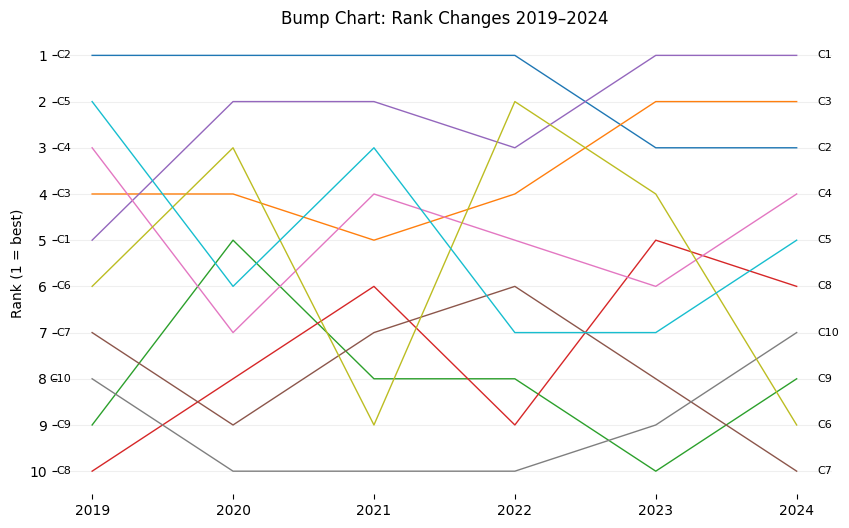

In [9]:
#########################################################
# 2) Bump Chart (rank over time, 10 categories × 6 years)
#
# Why Tuftean: thin lines + direct labeling = high data-ink; conveys order and crossovers.
# Read it: the nearer to the top, the better the rank; crossing lines = changing leadership.
#
# Tableau: compute RANK() table calc over Category (addressing) and Year (partitioning); Marks=Line; reverse y-axis so rank 1 is at top; label both ends.
# Power BI: create Rank = RANKX(ALL(Category), [Score], , DESC, Dense) for each year; line chart with Y = Rank (reverse scale), X = Year, Legend = Category; labels at ends (or use Deneb for end labels).
#
#########################################################

import numpy as np, pandas as pd, matplotlib.pyplot as plt

#### This my output path you will need to set path on your computer
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"


np.random.seed(7)
cats = [f"C{i}" for i in range(1,11)]
years = np.arange(2019, 2025)

# make noisy scores and convert to ranks per year (1 = best)
scores = {y: np.random.rand(len(cats)) + np.linspace(1, 0, len(cats)) for y in years}
rank_tbl = pd.DataFrame({y: pd.Series(scores[y], index=cats).rank(ascending=False, method="first")
                         for y in years})
rank_tbl = rank_tbl.loc[np.random.permutation(cats)]  # shuffle order

fig, ax = plt.subplots(figsize=(10,6))
for c in rank_tbl.index:
    ax.plot(years, rank_tbl.loc[c], lw=1)
    ax.text(years[0]-0.15, rank_tbl.loc[c, years[0]], c, ha='right', va='center', fontsize=8)
    ax.text(years[-1]+0.15, rank_tbl.loc[c, years[-1]], c, ha='left',  va='center', fontsize=8)

ax.set_ylim(10.5, 0.5); ax.set_xticks(years)
ax.set_yticks(range(1,11)); ax.set_ylabel("Rank (1 = best)")
ax.grid(alpha=.2, axis='y'); 
for s in ax.spines.values(): s.set_visible(False)
plt.title("Bump Chart: Rank Changes 2019–2024")
plt.show()

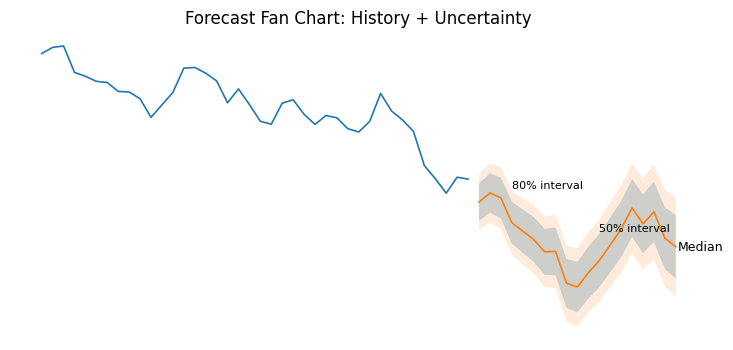

In [10]:
#########################################################
# 3) Forecast Fan Chart (uncertainty bands)
# 
# Why Tuftean: layering & separation—thin median atop translucent intervals; direct labels beat legends.
# Read it: wider bands = greater uncertainty; the median is the crisp narrative spine.
#
# Tableau: compute quantiles (e.g., in Prep/Python) → plot two Area bands (P25–P75, P10–P90) plus a Line for median; turn off grid/axes; label on the data.
# Power BI: build measures for P10/25/50/75/90; Area chart for bands (stacked with transparency) + Line for median; or use Deneb with an area layer (y/y2) and a median line.
#
#########################################################

import numpy as np, matplotlib.pyplot as plt

#### This my output path you will need to set path on your computer
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"


np.random.seed(3)
t_hist = np.arange(1, 41)        # 40 historical points
base = 50 + np.cumsum(np.random.normal(0, 0.6, size=t_hist.size))
t_f = np.arange(41, 60)          # 19-step forecast

# simulate quantile paths
steps = t_f.size
med = base[-1] + np.cumsum(np.random.normal(0, 0.6, steps))
p10 = med - (1.2 + 0.05*np.arange(steps))
p25 = med - (0.8 + 0.03*np.arange(steps))
p75 = med + (0.8 + 0.03*np.arange(steps))
p90 = med + (1.2 + 0.05*np.arange(steps))

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(t_hist, base, lw=1.2)
ax.fill_between(t_f, p25, p75, alpha=.25)
ax.fill_between(t_f, p10, p90, alpha=.15)
ax.plot(t_f, med, lw=1.2)

ax.text(t_f[-1]+0.2, med[-1], "Median", va='center', fontsize=9)
ax.text(t_f[int(steps*0.6)], p75[int(steps*0.6)]+.1, "50% interval", fontsize=8)
ax.text(t_f[int(steps*0.2)], p90[int(steps*0.2)]+.1, "80% interval", fontsize=8)

ax.set_xticks([]); ax.set_yticks([])
for s in ax.spines.values(): s.set_visible(False)
plt.title("Forecast Fan Chart: History + Uncertainty")
plt.show()


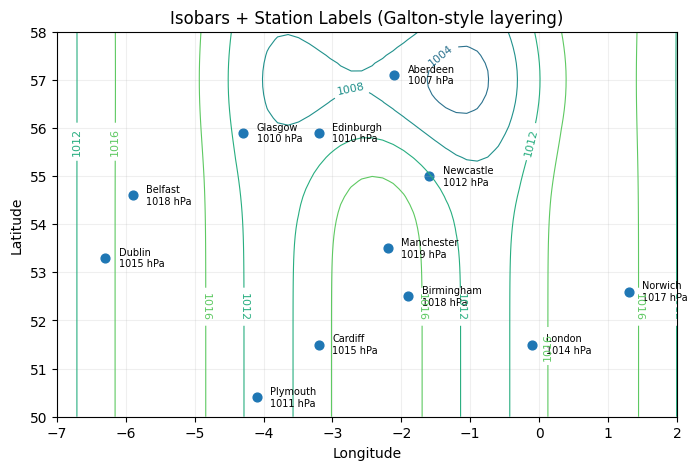

In [6]:
#########################################################
# 4) Synoptic Map with Isobars (contours) + Stations
# 
# Why Tuftean: multivariate layering: position (lat/lon), contour isolines (pressure field), point labels (station observations).
# Read it: contour spacing shows gradients; stations provide ground truth.
# Tableau: you’ll need a gridded surface (lon/lat/value) → Contour Lines are not native; use a pre-rendered contour layer (image) or a polygon isoband generator upstream; overlay stations with Circle + Label.
# Power BI: use Deneb (mark: contour in Vega-Lite via transforms) or precompute contours (TopoJSON/GeoJSON lines) and overlay with Azure Maps; stations are simple points with labels.
#########################################################

import numpy as np, matplotlib.pyplot as plt

#### This my output path you will need to set path on your computer
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"


# synthetic pressure field over lon[-7, 2], lat[50, 58]
lon = np.linspace(-7, 2, 60); lat = np.linspace(50, 58, 50)
LON, LAT = np.meshgrid(lon, lat)
pressure = 1015 - 12*np.exp(-((LON+2)**2 + (LAT-57)**2)/3) + 4*np.sin(LON*2)  # hPa

# sample 12 stations
stations = [("London", 51.5, -0.1), ("Birmingham", 52.5, -1.9),
            ("Manchester", 53.5, -2.2), ("Newcastle", 55.0, -1.6),
            ("Glasgow", 55.9, -4.3), ("Edinburgh", 55.9, -3.2),
            ("Cardiff", 51.5, -3.2), ("Belfast", 54.6, -5.9),
            ("Dublin", 53.3, -6.3), ("Aberdeen", 57.1, -2.1),
            ("Norwich", 52.6,  1.3), ("Plymouth", 50.4, -4.1)]

fig, ax = plt.subplots(figsize=(8,5))
cs = ax.contour(LON, LAT, pressure, levels=np.arange(992, 1026, 4), linewidths=.8)
ax.clabel(cs, inline=True, fontsize=8, fmt="%.0f")
ax.scatter([s[2] for s in stations], [s[1] for s in stations], s=40)

for name, la, lo in stations:
    # sample the gridded pressure for label value
    pi = pressure[(np.abs(lat-la)).argmin(), (np.abs(lon-lo)).argmin()]
    ax.text(lo+0.2, la, f"{name}\n{pi:.0f} hPa", fontsize=7, va='center')

ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude"); ax.grid(alpha=.2)
plt.title("Isobars + Station Labels (Galton-style layering)")
plt.show()

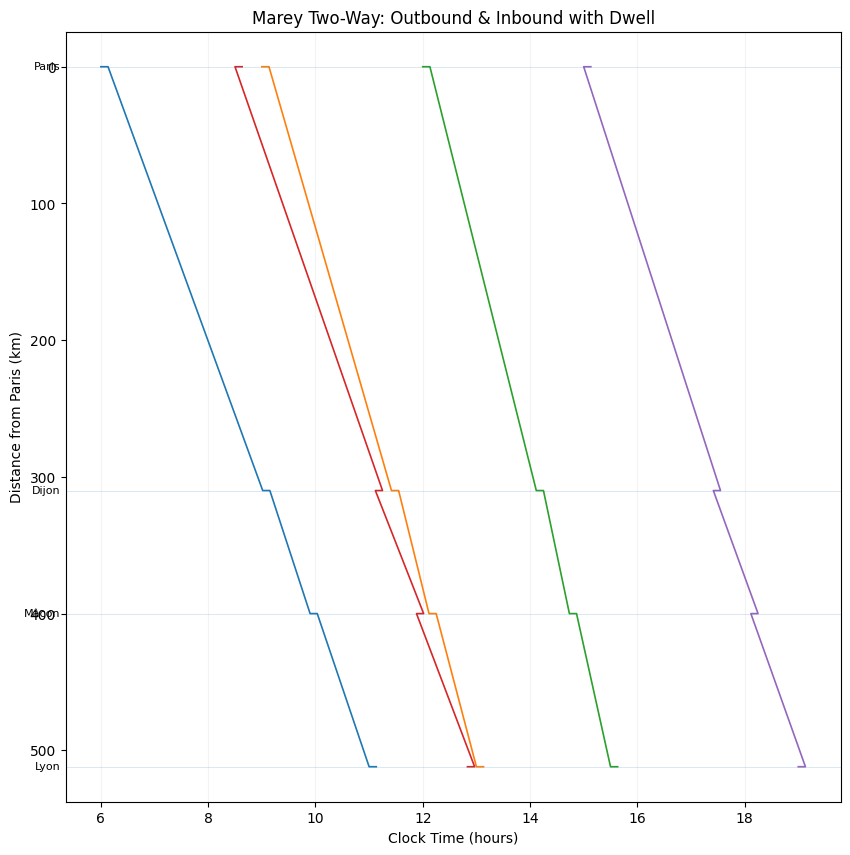

In [14]:
#########################################################
# 5) Two-Way Marey Diagram with Dwell & Meets
#
# Why Tuftean: a single 2D plot encodes time, distance, direction, speed, dwell, and train meets.
# Read it: slope = speed; horizontal segments = station dwells; where up & down lines cross = trains meet.
# 
# Tableau: long table (Train, Direction, Station, km, time_hours); Marks=Line; Path = time; add duplicated points per station with a small time offset to draw horizontal dwell segments; reverse y-axis; overlay inbound/outbound; crossings are visible meets.
# Power BI: Line chart (use -km to reverse); group by Direction/Train; to draw dwell, duplicate each station row with time_hours + dwell/60; or use Deneb for finer control of paths.
#########################################################

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#### This my output path you will need to set path on your computer
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"


# Route
stations = [('Paris',0), ('Dijon',310), ('Mâcon',400), ('Lyon',512)]

# Outbound (Paris→Lyon)
out = {'O1':('06:00',300), 'O2':('09:00',240), 'O3':('12:00',210)}
# Inbound (Lyon→Paris)
inn = {'I1':('08:30',260), 'I2':('15:00',240)}

def path(depart_time, total_min, reverse=False, dwell_min=8):
    t0 = datetime.strptime(depart_time, "%H:%M")
    xs, ys = [], []
    seq = stations[::-1] if reverse else stations
    for name, km in seq:
        prop = km/stations[-1][1]
        tt = t0 + timedelta(minutes=int(total_min * prop))
        # dwell at each station
        xs += [tt.hour+tt.minute/60, tt.hour+(tt.minute+dwell_min)/60]
        ys += [km, km]
    return xs, ys

fig, ax = plt.subplots(figsize=(10,10))
# plot outbound (descending y), inbound (ascending y)
for tid,(t0,dur) in out.items():
    xs, ys = path(t0, dur, reverse=False)
    ax.plot(xs, ys, lw=1.2)
for tid,(t0,dur) in inn.items():
    xs, ys = path(t0, dur, reverse=True)
    ax.plot(xs, ys, lw=1.2)

# station gridlines
for name, km in stations:
    ax.axhline(km, lw=.4, alpha=.3)
    ax.text(ax.get_xlim()[0]-0.1, km, name, ha='right', va='center', fontsize=8)

ax.set_xlabel("Clock Time (hours)"); ax.set_ylabel("Distance from Paris (km)")
ax.invert_yaxis(); ax.grid(alpha=.15, axis='x')
plt.title("Marey Two-Way: Outbound & Inbound with Dwell")
plt.show()

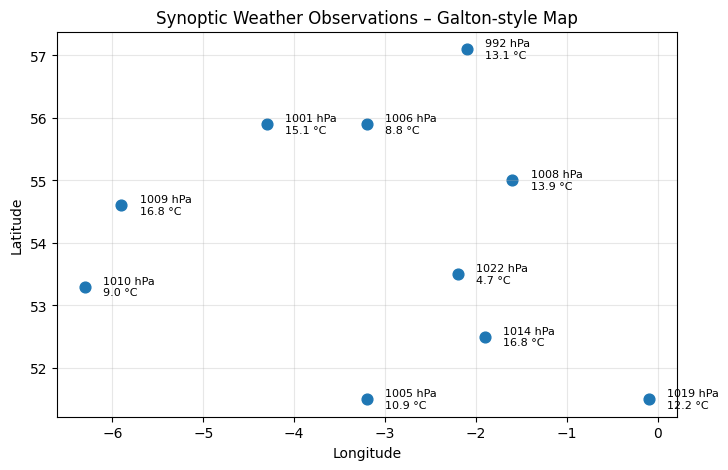

In [5]:
# ------------------------------------------------------------------
# 3. Galton – Daily Synoptic Weather Map
# ------------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt


# Set the output path to "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"
output_path = "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2025/BIS 411 - Fall 2025/Tufte Data"
	
df_weather = pd.read_csv(f"{output_path}/galton_weather.csv")
	
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df_weather["lon"], df_weather["lat"], s=60)
	
for _, r in df_weather.iterrows():
    ax.text(r["lon"] + 0.20, r["lat"],
            f"{int(r['pressure_hPa'])} hPa\n{r['temp_C']:.1f} °C",
            fontsize=8, va="center")
	
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(alpha=0.30)

plt.title("Synoptic Weather Observations – Galton-style Map")
plt.show()
	
fig.savefig(f"{output_path}/Synoptic Weather Observations – Galton-style Map.png", bbox_inches="tight")
